# [ PART 03. 통계분석 ] - 5장. 상관분석

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 분석을 위한 패키지
from scipy import stats

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
#from matplotlib import font_manager as fm

## 상관계수

In [2]:
# 데이터 프레임 생성
df_airq = pd.read_csv( 'C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\airquality.csv',
                       index_col = 'Unnamed: 0')

In [3]:
# Month, Day 컬럼 삭제

df_airq = df_airq.drop( ['Month', 'Day'], axis = 1 )
df_airq

,Ozone,Solar.R,Wind,Temp
1,41.0,190.0,7.4,67
2,36.0,118.0,8.0,72
3,12.0,149.0,12.6,74
4,18.0,313.0,11.5,62
5,NaN,NaN,14.3,56
...,...,...,...,...
149,30.0,193.0,6.9,70
150,NaN,145.0,13.2,77
151,14.0,191.0,14.3,75
152,18.0,131.0,8.0,76


In [4]:
df_airq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.0 KB


In [5]:
# 결측치 확인

df_airq.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
dtype: int64

In [6]:
# 결측치가 포함된 행 제거

df_airq_dropna = df_airq.dropna()
df_airq_dropna.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
dtype: int64

### 상관계수 구하기

In [7]:
# 상관계수 구하기 (DataFrame 일 경우)

# pandas.Series.corr( other Series,
#                     method = 'pearson',  # 기본값은 'pearson' : 피어슨 상관계수
#                                          # 'kendall' : 켄달의 순위상관계수
#                                          # 'spearman' : 스피어만 상관계수                                              
#                     min_periods = 1 )  # 유효한 결과를 얻기 위해 컬럼 한 쌍 당 팔요한 최소관찰 수 지정 

In [8]:
# 상관계수 구하기 (DataFrame 일 경우)

# pandas.DataFrame.corr( method = 'pearson',  # 기본값은 'pearson' : 피어슨 상관계수
#                                             # 'kendall' : 켄달의 순위상관계수
#                                             # 'spearman' : 스피어만 상관계수                                              
#                        min_periods = 1 )  # 유효한 결과를 얻기 위해 컬럼 한 쌍 당 팔요한 최소관찰 수 지정 

In [9]:
p = df_airq_dropna.corr()
k = df_airq_dropna.corr( method = 'kendall' )
s = df_airq_dropna.corr( method = 'spearman' )

print('< Pearson correlation coefficient >')
print( p )
print()

print('< Kendall Tau correlation coefficient >')
print( k )
print()

print('< Spearman rank correlation >')
print( s )
print()

< Pearson correlation coefficient >
            Ozone   Solar.R      Wind      Temp
Ozone    1.000000  0.348342 -0.612497  0.698541
Solar.R  0.348342  1.000000 -0.127183  0.294088
Wind    -0.612497 -0.127183  1.000000 -0.497190
Temp     0.698541  0.294088 -0.497190  1.000000

< Kendall Tau correlation coefficient >
            Ozone   Solar.R      Wind      Temp
Ozone    1.000000  0.240319 -0.440459  0.586147
Solar.R  0.240319  1.000000 -0.043013  0.142902
Wind    -0.440459 -0.043013  1.000000 -0.362387
Temp     0.586147  0.142902 -0.362387  1.000000

< Spearman rank correlation >
            Ozone   Solar.R      Wind      Temp
Ozone    1.000000  0.348186 -0.605136  0.772932
Solar.R  0.348186  1.000000 -0.061696  0.209537
Wind    -0.605136 -0.061696  1.000000 -0.499323
Temp     0.772932  0.209537 -0.499323  1.000000



### 시각화

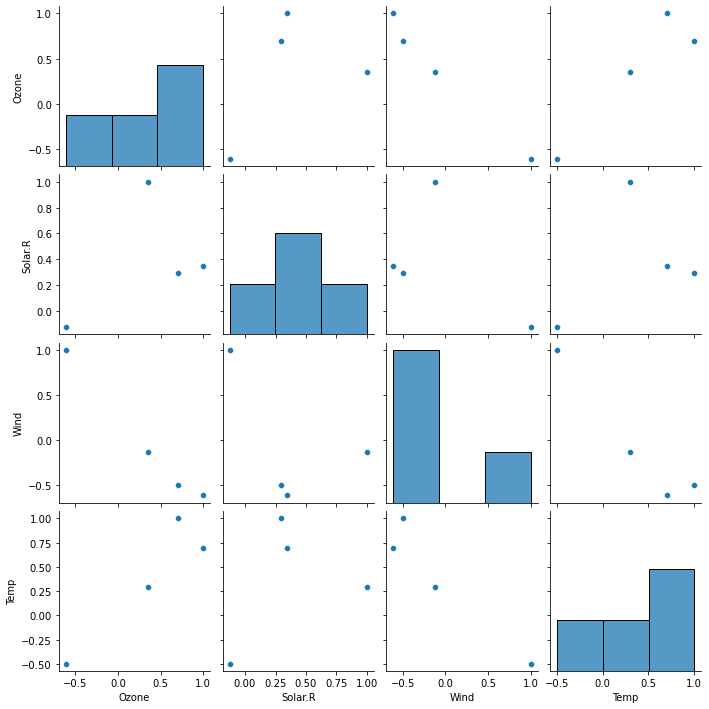

In [10]:
sb.pairplot( p )
plt.show()
print()

In [11]:
ozone = df_airq_dropna['Ozone']
wind = df_airq_dropna['Wind']

ozone.corr(wind)

-0.612496576314212

## 상관계수 검정

< 가설 설정 - 상관계수 검정 >
- 귀무가설(H0) : 두 변수 간에는 상관관계가 없다.
- 대립가설(H1) : 두 변수 간에는 상관관계가 있다.

< 유의수준은 0.05 로 설정 >

In [12]:
# 상관계수에 대한 검정 수행

# scipy.stats.pearsonr(x, y)    # 입력 배열

# scipy.stats.kendalltau( x, y,    # 같은 모양의 순위 배열. 만약, 배열이 1차원이 아니라면 1차원으로 평면화된다.
#                         nan_policy = 'propagate',    # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                      # 'propagate': NaN 을 반환
#                                                      # 'rarise': 에러를 발생시킨다.
#                                                      # 'omit' : NaN 값을 무시하고 계산을 수행
#                         method = 'auto',    # p-값을 계산하는 데 사용되는 방법을 정의. 기본값은 'auto'
#                                             # 'auto': 속도와 정확도 간의 균형을 기반으로 적절한 방법을 선택
#                                             # 'asymptotic': 큰 표본에 유효한 정규 근사값을 사용
#                                             # 'exact': 정확한 p-값을 계산하지만 동률이 없는 경우에만 사용. 샘플 크기가 증가함에 따라 계산 시간이 증가하고 결과의 정밀도에 약간의 손실이 있을 수 있음.
#                         variant ='b' )    # 반환 되는 Kendall 의 tau 변형을 정의. 'b'와 'c' 중에 선택하여 적용. 기본값은 'b'.

# scipy.stats.spearmanr( a, b = None,    # 여러 변수와 관측값을 포함하는 하나 또는 두 개의 1차원 또는 2차원 배열.
#                                        # b 는 선택사항.
#                        axis = 0,    # axis = 0 (기본값)이면 각 열은 행에 관측값이 있는 변수를 나타냄.
#                                     # axis = 1 이면 관계가 전치됨. 각 행은 변수를 나타내고 열은 관측값을 포함함.
#                                     # axis = None이면 두 배열이 모두 얽힌다.
#                        nan_policy = 'propagate',   # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                    # 'propagate': NaN 을 반환
#                                                    # 'rarise': 에러를 발생시킨다.
#                                                    # 'omit' : NaN 값을 무시하고 계산을 수행
#                        alternative = 'two-sided' )    # 대립 가설을 정의. 기본값은 'two-sided'
#                                                       # 'two-sided': 상관 관계가 0 이 아니다.
#                                                       # 'less': 상관관계가 0 보다 작다.
#                                                       # 'greater': 상관관계가 0 보다 크다.

result = stats.pearsonr( ozone, wind )
print( f' correlation: {result[0]:.4f}, \n P-value: {result[1]:.24f} ' )

if result[1] > 0.05:
    print(' p-value > 0.05 이므로 귀무가설 채택. 두 변수 간에는 상관관계가 없다.')
if result[1] < 0.05:
    print(' p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.')

 correlation: -0.6125, 
 P-value: 0.000000000000908941532654 
 p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.
